# DATA Acquisition for EPD - filtering and aggregation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [12]:
import urllib.request
import json
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from urllib.error import HTTPError, URLError
import os

# Parameters
years = list(range(2015, 2026))
months = [f'{m:02d}' for m in range(1, 13)]
batch_size = 1000000
maxi = 20000
output_dir = "monthly_aggregates"

os.makedirs(output_dir, exist_ok=True)

for year in years:
    for month in months:
        resource_id = f'EPD_{year}{month}'
        print(f"Processing {resource_id}...")

        records = []
        offset = 0
        pbar = tqdm(desc=f"{resource_id}", leave=False)

        try:
            # Delete the file if it exists before processing
            output_file = os.path.join(output_dir, f"{resource_id}.parquet")
            if os.path.exists(output_file):
                os.remove(output_file)

            index = 0
            while True:
                index += 1
                url = f'https://opendata.nhsbsa.net/api/3/action/datastore_search?resource_id={resource_id}&limit={batch_size}&offset={offset}'

                with urllib.request.urlopen(url) as response:
                    content = response.read()

                data = json.loads(content.decode("utf-8"))

                if "result" not in data or "records" not in data["result"]:
                    print(f"No result found in API response for {resource_id}")
                    break

                batch_records = data["result"]["records"]
                if not batch_records:
                    break  # No more data

                # Instead of appending to list, process this batch immediately
                df_batch = pd.DataFrame(batch_records)

                # Ensure numeric conversion
                if 'ACTUAL_COST' in df_batch.columns:
                    df_batch['ACTUAL_COST'] = pd.to_numeric(df_batch['ACTUAL_COST'], errors='coerce')
                else:
                    print(f"'ACTUAL_COST' column missing in batch for {resource_id}, skipping batch")
                    continue

                group_fields = ['REGIONAL_OFFICE_NAME', 'PCO_NAME', 'BNF_CHAPTER_PLUS_CODE']
                if not all(col in df_batch.columns for col in group_fields):
                    print(f"Missing required columns in batch for {resource_id}, skipping batch")
                    continue

                grouped_batch = df_batch.groupby(group_fields).agg(
                    TOTAL_COST=('ACTUAL_COST', 'sum')
                ).reset_index()

                # Add YEAR, MONTH, YEAR_MONTH columns
                grouped_batch['YEAR'] = int(year)
                grouped_batch['MONTH'] = int(month)
                grouped_batch['YEAR_MONTH'] = f'{year}-{month}'

                # Save or append grouped_batch to disk immediately
                if os.path.exists(output_file):
                    # Append to existing file efficiently
                    existing_df = pd.read_parquet(output_file)
                    combined_df = pd.concat([existing_df, grouped_batch], ignore_index=True)
                    # Optional: aggregate duplicates if needed here to save space
                    combined_df = combined_df.groupby(group_fields + ['YEAR', 'MONTH', 'YEAR_MONTH'], as_index=False).agg(
                        TOTAL_COST=('TOTAL_COST', 'sum')
                    )
                    combined_df.to_parquet(output_file, index=False)
                else:
                    grouped_batch.to_parquet(output_file, index=False)

                offset += batch_size
                pbar.update(1)

                if index > maxi:
                    break

            pbar.close()

        except (HTTPError, URLError) as e:
            print(f"Failed to fetch {resource_id}: {e}")
        except json.JSONDecodeError as e:
            print(f"Invalid JSON for {resource_id}: {e}")
        except Exception as e:
            print(f"Unexpected error for {resource_id}: {e}")

print("Processing complete.")


Processing EPD_201501...


Processing EPD_201502...


Processing EPD_201503...


Processing EPD_201504...


Processing EPD_201505...


Processing EPD_201506...


Processing EPD_201507...


Processing EPD_201508...


Processing EPD_201509...


Processing EPD_201510...


Processing EPD_201511...


Processing EPD_201512...


Processing EPD_201601...


Processing EPD_201602...


Processing EPD_201603...


Processing EPD_201604...


Processing EPD_201605...


Processing EPD_201606...


Processing EPD_201607...


Processing EPD_201608...


Processing EPD_201609...


Processing EPD_201610...


Processing EPD_201611...


Processing EPD_201612...


Processing EPD_201701...


Processing EPD_201702...


Processing EPD_201703...


Processing EPD_201704...


Processing EPD_201705...


Processing EPD_201706...


Processing EPD_201707...


Processing EPD_201708...


Processing EPD_201709...


Processing EPD_201710...


Processing EPD_201711...


Processing EPD_201712...


Processing EPD_201801...


Processing EPD_201802...


Processing EPD_201803...


Processing EPD_201804...


Processing EPD_201805...


Processing EPD_201806...


Processing EPD_201807...


Processing EPD_201808...


Processing EPD_201809...


Processing EPD_201810...


Processing EPD_201811...


Processing EPD_201812...


Processing EPD_201901...


Processing EPD_201902...


Processing EPD_201903...


Processing EPD_201904...


Processing EPD_201905...


Processing EPD_201906...


Processing EPD_201907...


Processing EPD_201908...


Processing EPD_201909...


Processing EPD_201910...


Processing EPD_201911...


Processing EPD_201912...


Processing EPD_202001...


Processing EPD_202002...


Processing EPD_202003...


Processing EPD_202004...


Processing EPD_202005...


Processing EPD_202006...


Processing EPD_202007...


Processing EPD_202008...


Processing EPD_202009...


Processing EPD_202010...


Processing EPD_202011...


Processing EPD_202012...


Processing EPD_202101...


Processing EPD_202102...


Processing EPD_202103...


Processing EPD_202104...


Processing EPD_202105...


Processing EPD_202106...


Processing EPD_202107...


Processing EPD_202108...


Processing EPD_202109...


Processing EPD_202110...


Processing EPD_202111...


Processing EPD_202112...


Processing EPD_202201...


Processing EPD_202202...


Processing EPD_202203...


Processing EPD_202204...


Processing EPD_202205...


Processing EPD_202206...


Processing EPD_202207...


Processing EPD_202208...


Processing EPD_202209...


Processing EPD_202210...


Processing EPD_202211...


Processing EPD_202212...


Processing EPD_202301...


Processing EPD_202302...


Processing EPD_202303...


Processing EPD_202304...


Processing EPD_202305...


Processing EPD_202306...


Processing EPD_202307...


Processing EPD_202308...


Processing EPD_202309...


Processing EPD_202310...


Processing EPD_202311...


Processing EPD_202312...


Processing EPD_202401...


Processing EPD_202402...


Processing EPD_202403...


Processing EPD_202404...


Processing EPD_202405...


Processing EPD_202406...


Processing EPD_202407...


Processing EPD_202408...


Processing EPD_202409...


Processing EPD_202410...


Processing EPD_202411...


Processing EPD_202412...


Processing EPD_202501...


Processing EPD_202502...


Processing EPD_202503...


Processing EPD_202504...


Processing EPD_202505...


EPD_202505: 0it [00:00, ?it/s]

Failed to fetch EPD_202505: HTTP Error 404: NOT FOUND
Processing EPD_202506...


Failed to fetch EPD_202506: HTTP Error 404: NOT FOUND
Processing EPD_202507...


EPD_202507: 0it [00:00, ?it/s]

Failed to fetch EPD_202507: HTTP Error 404: NOT FOUND
Processing EPD_202508...


Failed to fetch EPD_202508: HTTP Error 404: NOT FOUND
Processing EPD_202509...


EPD_202509: 0it [00:00, ?it/s]

Failed to fetch EPD_202509: HTTP Error 404: NOT FOUND
Processing EPD_202510...


Failed to fetch EPD_202510: HTTP Error 404: NOT FOUND
Processing EPD_202511...


EPD_202511: 0it [00:00, ?it/s]

Failed to fetch EPD_202511: HTTP Error 404: NOT FOUND
Processing EPD_202512...


Failed to fetch EPD_202512: HTTP Error 404: NOT FOUND
Processing complete.


In [13]:
# Read all of the parquet files and concatenate them
import os
import pandas as pd

# Directory containing parquet files
data_dir = "monthly_aggregates"

# List all parquet files in the directory
parquet_files = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.parquet')]

# Aggregate data from all files
dataframes = []
for file in parquet_files:
    df = pd.read_parquet(file)
    dataframes.append(df)

# Concatenate all dataframes into a single dataframe
aggregated_data = pd.concat(dataframes, ignore_index=True)

# Save the aggregated data to a new parquet file
output_file = os.path.join(data_dir, "aggregated_data.parquet")
aggregated_data.to_parquet(output_file, index=False)

print(f"Aggregated data saved to {output_file}")

Aggregated data saved to monthly_aggregates\aggregated_data.parquet


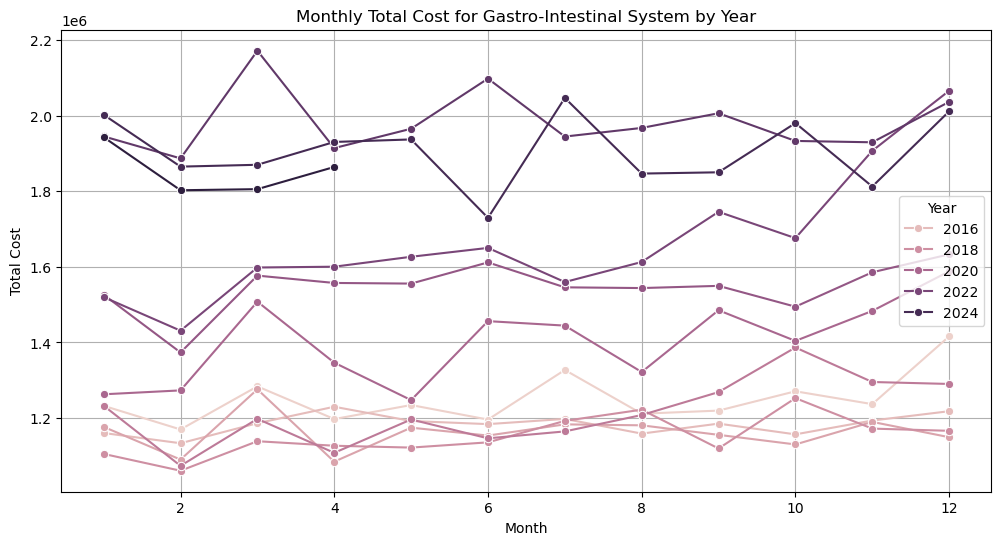

In [ ]:
aggregated_data
filtered_data = aggregated_data[aggregated_data['BNF_CHAPTER_PLUS_CODE'] == '01: Gastro-Intestinal System']

# Group data by year and month
plot_data = filtered_data.groupby(['YEAR', 'MONTH']).agg({'TOTAL_COST': 'sum'}).reset_index()

# Plot the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, x='MONTH', y='TOTAL_COST', hue='YEAR', marker='o')
plt.title('Monthly Total Cost for Gastro-Intestinal System by Year')
plt.xlabel('Month')
plt.ylabel('Total Cost')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [8]:
filtered_data

,REGIONAL_OFFICE_NAME,PCO_NAME,BNF_CHAPTER_PLUS_CODE,YEAR,MONTH,YEAR_MONTH,TOTAL_COST
0,LONDON,BARKING & DAGENHAM CCG,01: Gastro-Intestinal System,2020,1,2020-01,28985.55545
20,LONDON,BARNET CCG,01: Gastro-Intestinal System,2020,1,2020-01,94130.08304
40,LONDON,BEXLEY CCG,01: Gastro-Intestinal System,2020,1,2020-01,62807.21355
60,LONDON,BMI HEALTHCARE,01: Gastro-Intestinal System,2020,1,2020-01,189.56017
69,LONDON,BRENT CCG,01: Gastro-Intestinal System,2020,1,2020-01,71283.99622
...,...,...,...,...,...,...,...
138413,SOUTH WEST,SOMERSET NHS FOUNDATION TRUST,01: Gastro-Intestinal System,2022,12,2022-12,10.51164
138424,SOUTH WEST,SOUTH WESTERN AMBULANCE SERVICE NHS FOUN,01: Gastro-Intestinal System,2022,12,2022-12,9.75744
138459,SOUTH WEST,UNIVERSITY HOSPITALS PLYMOUTH NHS TRUST,01: Gastro-Intestinal System,2022,12,2022-12,6.00810
138473,SOUTH WEST,WILTSHIRE HEALTH & CARE,01: Gastro-Intestinal System,2022,12,2022-12,28.43980
